In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
# obtenir l'intitulé du poste
#job_name = parser.find_all("a", class_="job-title")[0]
#print(job_name.text)

In [3]:
# obtenir le nom de la société qui recrute
#society = parser.find_all("div", class_="snapshot-item")[0].text
#print(society)

In [4]:
# obtenir le type de contrat
#contract = parser.find_all("div", class_="snapshot-item")[0].text
#print(contract)

In [5]:
# obtenir les compétences demandées
#skill_tags = parser.find_all("div", class_="tags")[0]
#skill = skill_tags.find_all("a", class_="tag")[0].text
#print(skill)

In [6]:
#job_containers = parser.find_all("a", class_="job-title")
#print(type(job_containers))
#print(len(job_containers))

In [7]:
#html_jeudi = BeautifulSoup(content, "html.parser")
#type(html_jeudi)

In [8]:
# on crée des listes vides pour toutes nos informations : 
#job_names = []
#societies = []
#contracts = []
#skills = []

"""
# On reprend notre data job_container pour y extraire l'information
for i in range (len(job_containers)):
    for container in job_containers:

        # obtenir l'intitulé du poste
        job_name = parser.find_all("a", class_="job-title")[0].text
        job_names.append(job_name) # on ajoute chaque élément name de la boucle à la liste names
        
        # obtenir le nom de la société qui recrute
        society = parser.find_all("div", class_="snapshot-item")[0].text
        societies.append(society)
        
        # obtenir le type de contrat
        contract = parser.find_all("div", class_="snapshot-item")[1].text
        contracts.append(contract)
        
        # obtenir les compétences demandées
        skill_tags = parser.find_all("div", class_="tags")[0]
        skill = skill_tags.find_all("a", class_="tag")[0].text
        
        nb += 1
"""    

'\n# On reprend notre data job_container pour y extraire l\'information\nfor i in range (len(job_containers)):\n    for container in job_containers:\n\n        # obtenir l\'intitulé du poste\n        job_name = parser.find_all("a", class_="job-title")[0].text\n        job_names.append(job_name) # on ajoute chaque élément name de la boucle à la liste names\n        \n        # obtenir le nom de la société qui recrute\n        society = parser.find_all("div", class_="snapshot-item")[0].text\n        societies.append(society)\n        \n        # obtenir le type de contrat\n        contract = parser.find_all("div", class_="snapshot-item")[1].text\n        contracts.append(contract)\n        \n        # obtenir les compétences demandées\n        skill_tags = parser.find_all("div", class_="tags")[0]\n        skill = skill_tags.find_all("a", class_="tag")[0].text\n        \n        nb += 1\n'

In [9]:
base_url_1 = 'https://www.lesjeudis.com/recherche?loc=Paris&pg='
base_url_2 = '&q=data+analyst'

postes = []
societes = []
contrats = []
competences = []


for num_page in range(10):
    url = f'{base_url_1}{num_page}{base_url_2}'
    print(url)
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    
    
    # obtenir l'intitulé du poste
    job_name = soup.find_all("div", attrs={"class":"job-info"})
    
    for i in job_name:
        postes.append(i.find("a").text.strip("\n"))

        
    # obtenir le nom de la société qui recrute
    society = soup.find_all("div", attrs={"class":"snapshot"})
    
    for i in society:
        societes.append(i.find("a").text.strip("\n"))
        
        
    # obtenir le type de contrat
    contract = soup.find_all("div", attrs={"class":"snapshot"})
    
    for i in contract:
        contrats.append(i.find_all("div", class_="snapshot-item")[1].text.strip("\n"))
    
        
    # obtenir les compétences demandées
    skill_tags = soup.find_all("div", attrs={"class":"tags"})
    
    for i in skill_tags:
        if skill_tags is not None:
            competences.append(i.text.strip("\n"))

https://www.lesjeudis.com/recherche?loc=Paris&pg=0&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=1&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=2&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=3&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=4&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=5&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=6&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=7&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=8&q=data+analyst
https://www.lesjeudis.com/recherche?loc=Paris&pg=9&q=data+analyst


In [10]:
# définition des colonnes
d = {"Intitule_Poste": postes, "Nom_Societe": societes, "Type_de_contrat": contrats, "Competences": competences}

In [11]:
# construction du dataframe
df_final = pd.DataFrame(data=d)
df_final.head()

,Intitule_Poste,Nom_Societe,Type_de_contrat,Competences
0,Data Analyste,EDELIA groupe EDF,CDI - temps plein,python\n\nux\n\nt-sql\n\nlinux\n\nnosql
1,Data Analyst F/H,Temenis Conseil,CDI - temps plein,t-sql\n\nsql\n\nbig data\n\nmicrosoft\n\nsystème
2,Data Analyst / Big Data,Groupe HN,CDI - temps plein,hadoop\n\nsql\n\nbig data\n\nmachine learning\...
3,DATA ANALYSTE MARKETING ou DATA SCIENTIST,HR DNA,CDI - temps plein,marketing\n\noutils\n\nréseaux\n\nc++\n\nsupport
4,Data Analyst / Data Scientist Junior (H/F),Synchrone,CDI - temps plein,digital\n\nbig data\n\nmachine learning\n\npyt...


In [12]:
# on split la colonne Competences
competences_tags = df_final["Competences"].str.split("\n\n", n=4, expand=True)
competences_tags.head()

,0,1,2,3,4
0,python,ux,t-sql,linux,nosql
1,t-sql,sql,big data,microsoft,système
2,hadoop,sql,big data,machine learning,python
3,marketing,outils,réseaux,c++,support
4,digital,big data,machine learning,python,sql


In [13]:
competences_tags.columns=["tag_1", "tag_2", "tag_3", "tag_4", "tag_5"]
competences_tags.head()

,tag_1,tag_2,tag_3,tag_4,tag_5
0,python,ux,t-sql,linux,nosql
1,t-sql,sql,big data,microsoft,système
2,hadoop,sql,big data,machine learning,python
3,marketing,outils,réseaux,c++,support
4,digital,big data,machine learning,python,sql


In [14]:
# on marge le tableau initial avec le tableau de tags
df_final2 = pd.merge(df_final, competences_tags, left_index=True, right_index=True)
df_final2.head()

,Intitule_Poste,Nom_Societe,Type_de_contrat,Competences,tag_1,tag_2,tag_3,tag_4,tag_5
0,Data Analyste,EDELIA groupe EDF,CDI - temps plein,python\n\nux\n\nt-sql\n\nlinux\n\nnosql,python,ux,t-sql,linux,nosql
1,Data Analyst F/H,Temenis Conseil,CDI - temps plein,t-sql\n\nsql\n\nbig data\n\nmicrosoft\n\nsystème,t-sql,sql,big data,microsoft,système
2,Data Analyst / Big Data,Groupe HN,CDI - temps plein,hadoop\n\nsql\n\nbig data\n\nmachine learning\...,hadoop,sql,big data,machine learning,python
3,DATA ANALYSTE MARKETING ou DATA SCIENTIST,HR DNA,CDI - temps plein,marketing\n\noutils\n\nréseaux\n\nc++\n\nsupport,marketing,outils,réseaux,c++,support
4,Data Analyst / Data Scientist Junior (H/F),Synchrone,CDI - temps plein,digital\n\nbig data\n\nmachine learning\n\npyt...,digital,big data,machine learning,python,sql


In [15]:
# On supprime la colonne "Competences"
df_final2.drop("Competences", axis=1, inplace=True)

In [16]:
df_final2.head()

,Intitule_Poste,Nom_Societe,Type_de_contrat,tag_1,tag_2,tag_3,tag_4,tag_5
0,Data Analyste,EDELIA groupe EDF,CDI - temps plein,python,ux,t-sql,linux,nosql
1,Data Analyst F/H,Temenis Conseil,CDI - temps plein,t-sql,sql,big data,microsoft,système
2,Data Analyst / Big Data,Groupe HN,CDI - temps plein,hadoop,sql,big data,machine learning,python
3,DATA ANALYSTE MARKETING ou DATA SCIENTIST,HR DNA,CDI - temps plein,marketing,outils,réseaux,c++,support
4,Data Analyst / Data Scientist Junior (H/F),Synchrone,CDI - temps plein,digital,big data,machine learning,python,sql


In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df_final2['Type_de_contrat'].describe()

count                   200
unique                    5
top       CDI - temps plein
freq                    182
Name: Type_de_contrat, dtype: object

In [19]:
class_contrat = df_final2.groupby('Type_de_contrat').count()
class_contrat

,Intitule_Poste,Nom_Societe,tag_1,tag_2,tag_3,tag_4,tag_5
Type_de_contrat,,,,,,,
CDD/Intérim - temps partiel,1,1,1,1,0,0,0
CDI - temps plein,182,182,182,180,179,168,159
Contrat d'apprentissage,4,4,4,4,3,2,1
Contrat de professionnalisation,7,7,7,6,6,6,6
Stage,6,6,6,6,6,6,4


In [20]:
type_contrat_values = df_final2["Type_de_contrat"].unique()
type_contrat_values

array(['CDI - temps plein', 'Stage', "Contrat d'apprentissage",
       'Contrat de professionnalisation', 'CDD/Intérim - temps partiel'],
      dtype=object)

In [21]:
contrat_nb = class_contrat["Intitule_Poste"]
contrat_nb

Type_de_contrat
CDD/Intérim - temps partiel          1
CDI - temps plein                  182
Contrat d'apprentissage              4
Contrat de professionnalisation      7
Stage                                6
Name: Intitule_Poste, dtype: int64

In [22]:
dico_variable = dict({contrat_nb.index[0]: contrat_nb[0]})
dico_variable

{'CDD/Intérim - temps partiel': 1}

In [23]:
list(dico_variable.keys())

['CDD/Intérim - temps partiel']

In [24]:
dico_variable = {}
for i in range(len(contrat_nb)):
    dico_variable[contrat_nb.index[i]] = contrat_nb[i]
print(dico_variable)

{'CDD/Intérim - temps partiel': 1, 'CDI - temps plein': 182, "Contrat d'apprentissage": 4, 'Contrat de professionnalisation': 7, 'Stage': 6}


In [25]:
label=['{}, ({})'.format(k,v) for k,v in dico_variable.items()]

[1, 182, 4, 7, 6]


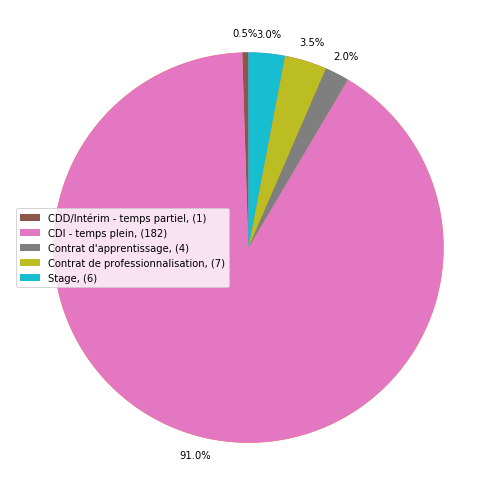

In [40]:
labels = label
sizes = list(dico_variable.values())
print(sizes)
explode = [0, 0, 0, 0, 0]

fig = plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=1, pctdistance=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="center left")

plt.tight_layout()

In [110]:
tag1_list= df_final2["tag_1"].value_counts().head(15)
tag1_list

outils                   23
big data                 15
support                  10
sql                       9
digital                   9
si                        9
marketing                 8
crm                       8
python                    7
sap                       6
agile                     6
cloud                     5
business intelligence     5
machine learning          5
data management           5
Name: tag_1, dtype: int64

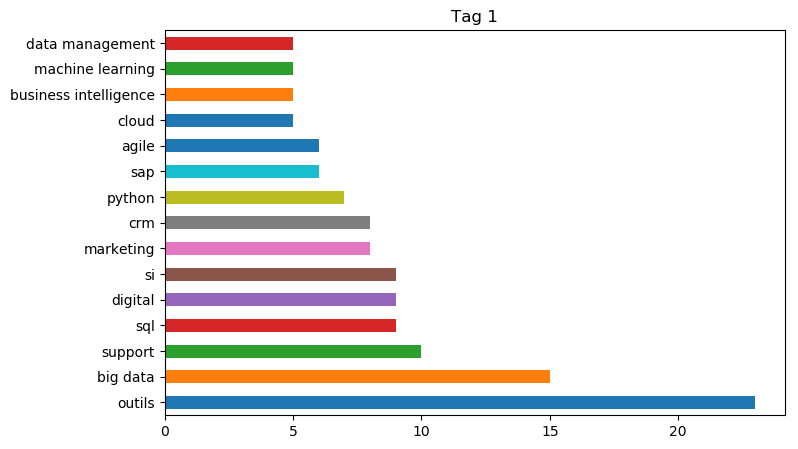

In [126]:
plt.figure(figsize=(8,5))
tag1_list.head(15).plot(kind='barh',title="Tag 1")

In [121]:
tag2_list = df_final2["tag_2"].value_counts().head(15)

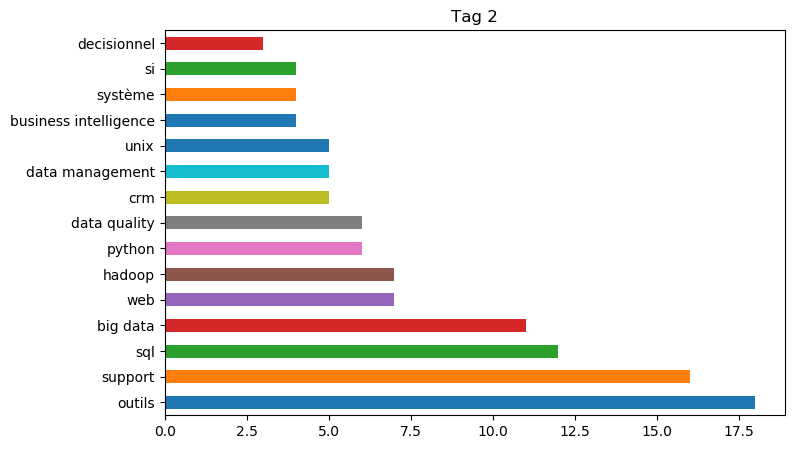

In [123]:
plt.figure(figsize=(8,5))
tag2_list.head(15).plot(kind='barh',title="Tag 2")